In [2]:
import numpy as np
import matplotlib.pyplot as plt
from main import day
from scipy.stats import spearmanr
from scipy.stats import ttest_ind

Let's assume there are three days with different peculiarities corresponding to their nature, thus different visiting clients' frequencies.

In [3]:
working_day = {
    '8:00-9:00': 1/150,
    '9:00-10:00': 1/170,
    '10:00-11:00': 1/225,
    '11:00-12:00': 1/250,
    '12:00-13:00': 1/300,
    '13:00-14:00': 1/250,
    '14:00-15:00': 1/150,
    '15:00-16:00': 1/100,
    '16:00-17:00': 1/70,
    '17:00-18:00': 1/50,
    '18:00-19:00': 1/70,
    '19:00-20:00': 1/150,
    '20:00-21:00': 1/200,
    '21:00-22:00': 1/250,
    '22:00-23:00': 1/350
}

day_off = {
    '8:00-9:00': 1/200,
    '9:00-10:00': 1/200,
    '10:00-11:00': 1/190,
    '11:00-12:00': 1/180,
    '12:00-13:00': 1/170,
    '13:00-14:00': 1/160,
    '14:00-15:00': 1/150,
    '15:00-16:00': 1/130,
    '16:00-17:00': 1/130,
    '17:00-18:00': 1/130,
    '18:00-19:00': 1/150,
    '19:00-20:00': 1/200,
    '20:00-21:00': 1/250,
    '21:00-22:00': 1/250,
    '22:00-23:00': 1/200
}

pre_holiday = {
    '8:00-9:00': 1/300,
    '9:00-10:00': 1/280,
    '10:00-11:00': 1/250,
    '11:00-12:00': 1/220,
    '12:00-13:00': 1/190,
    '13:00-14:00': 1/160,
    '14:00-15:00': 1/140,
    '15:00-16:00': 1/120,
    '16:00-17:00': 1/100,
    '17:00-18:00': 1/80,
    '18:00-19:00': 1/60,
    '19:00-20:00': 1/40,
    '20:00-21:00': 1/80,
    '21:00-22:00': 1/150,
    '22:00-23:00': 1/100
}

To fully analyze the impact of traditional counters and self-checkouts on shopping queue times, the number of traditional counters will vary, from 3 to 7, nonetheless, since self-checkouts registers do not require more than one employee (regardless from their amount), their total number will remain constant at six

In [4]:
working_day_3 = []
working_day_5 = []
working_day_7 = []

day_off_3 = []
day_off_5 = []
day_off_7 = []

pre_holiday_3 = []
pre_holiday_5 = []
pre_holiday_7 = []

for i in range(30):
    working_day_3.append(day(3, working_day))
    working_day_5.append(day(5, working_day))
    working_day_7.append(day(7, working_day))
    
    day_off_3.append(day(3, day_off))
    day_off_5.append(day(5, day_off))
    day_off_7.append(day(7, day_off))
    
    pre_holiday_3.append(day(3, pre_holiday))
    pre_holiday_5.append(day(5, pre_holiday))
    pre_holiday_7.append(day(7, pre_holiday))


In [5]:
pre_holiday_3_mean = np.mean(pre_holiday_3)
pre_holiday_5_mean = np.mean(pre_holiday_5)
pre_holiday_7_mean = np.mean(pre_holiday_7)

pre_holiday_3_max = max(pre_holiday_3)
pre_holiday_5_max = max(pre_holiday_5)
pre_holiday_7_max = max(pre_holiday_7)

pre_holiday_3_min = min(pre_holiday_3)
pre_holiday_5_min = min(pre_holiday_5)
pre_holiday_7_min = min(pre_holiday_7)


day_off_3_mean = np.mean(day_off_3)
day_off_5_mean = np.mean(day_off_5)
day_off_7_mean = np.mean(day_off_7)

day_off_3_max = max(day_off_3)
day_off_5_max = max(day_off_5)
day_off_7_max = max(day_off_7)

day_off_3_min = min(day_off_3)
day_off_5_min = min(day_off_5)
day_off_7_min = min(day_off_7)


working_day_3_mean = np.mean(working_day_3)
working_day_5_mean = np.mean(working_day_5)
working_day_7_mean = np.mean(working_day_7)

working_day_3_max = max(working_day_3)
working_day_5_max = max(working_day_5)
working_day_7_max = max(working_day_7)

working_day_3_min = min(working_day_3)
working_day_5_min = min(working_day_5)
working_day_7_min = min(working_day_7)

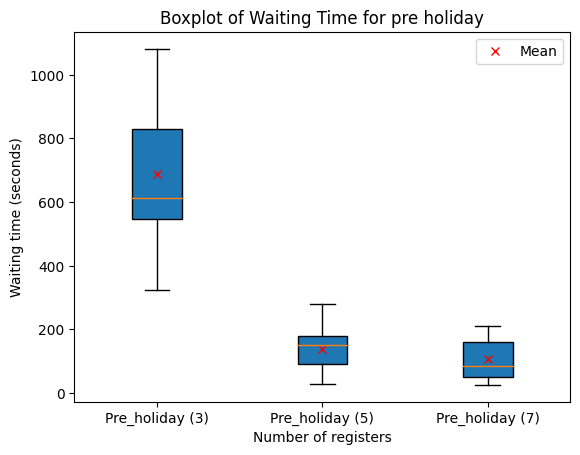

In [6]:
data = [pre_holiday_3, pre_holiday_5, pre_holiday_7]

fig, ax = plt.subplots()

# Tworzenie diagramu pudełkowego
box = ax.boxplot(data, vert=True, patch_artist=True, labels=['Pre_holiday (3)', 'Pre_holiday (5)', 'Pre_holiday (7)'], showfliers=False)

# Zaznaczanie średnich na diagramie
ax.plot([1, 2, 3], [pre_holiday_3_mean, pre_holiday_5_mean, pre_holiday_7_mean], marker='x', markersize=6, linestyle='', color='red', label='Mean')

# Ustawianie etykiet i tytułów
ax.set_xticks([1, 2, 3])
ax.set_xlabel('Number of registers')
ax.set_ylabel('Waiting time (seconds)')
ax.set_title('Boxplot of Waiting Time for pre holiday')

# Legenda
ax.legend()

plt.show()


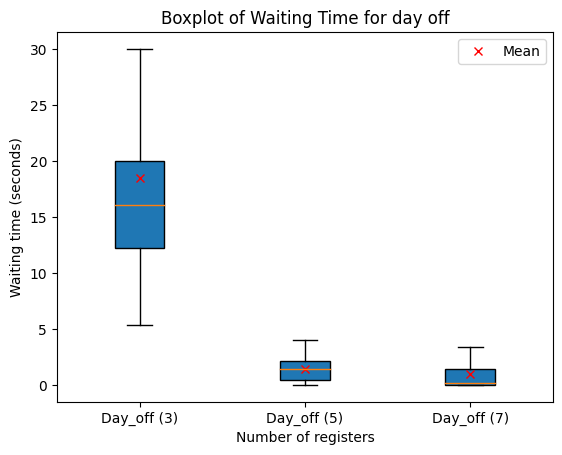

In [7]:
data = [day_off_3, day_off_5, day_off_7]

fig, ax = plt.subplots()

# Tworzenie diagramu pudełkowego
box = ax.boxplot(data, vert=True, patch_artist=True, labels=['Day_off (3)', 'Day_off (5)', 'Day_off (7)'], showfliers=False)

# Zaznaczanie średnich na diagramie
ax.plot([1, 2, 3], [day_off_3_mean, day_off_5_mean, day_off_7_mean], marker='x', markersize=6, linestyle='', color='red', label='Mean')

# Ustawianie etykiet i tytułów
ax.set_xticks([1, 2, 3])
ax.set_xlabel('Number of registers')
ax.set_ylabel('Waiting time (seconds)')
ax.set_title('Boxplot of Waiting Time for day off')

# Legenda
ax.legend()

plt.show()

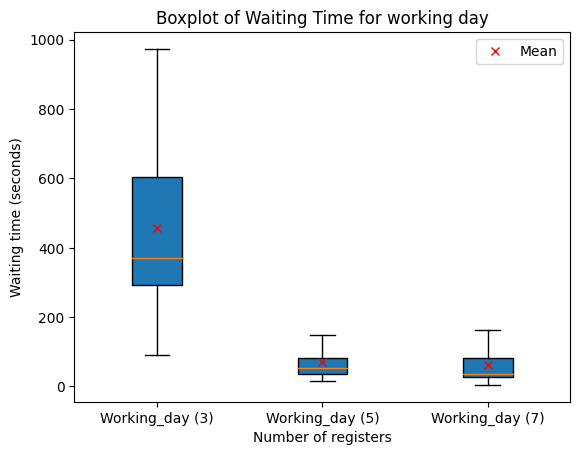

In [8]:
data = [working_day_3, working_day_5, working_day_7]

fig, ax = plt.subplots()

# Tworzenie diagramu pudełkowego
box = ax.boxplot(data, vert=True, patch_artist=True, labels=['Working_day (3)', 'Working_day (5)', 'Working_day (7)'], showfliers=False)

# Zaznaczanie średnich na diagramie
ax.plot([1, 2, 3], [working_day_3_mean, working_day_5_mean, working_day_7_mean], marker='x', markersize=6, linestyle='', color='red', label='Mean')

# Ustawianie etykiet i tytułów
ax.set_xticks([1, 2, 3])
ax.set_xlabel('Number of registers')
ax.set_ylabel('Waiting time (seconds)')
ax.set_title('Boxplot of Waiting Time for working day')

# Legenda
ax.legend()

plt.show()

TESTY STATYSTYCZNE

In [9]:
means = [pre_holiday_3_mean, pre_holiday_5_mean, pre_holiday_7_mean]
n = [3,5,7]

correlation_coefficient, p_value = spearmanr(n, means)
print(correlation_coefficient)

-1.0


In [10]:
means = [day_off_3_mean, day_off_5_mean, day_off_7_mean]
n = [3,5,7]

correlation_coefficient, p_value = spearmanr(n, means)
print(correlation_coefficient)

-1.0


In [11]:
means = [working_day_3_mean, working_day_5_mean, working_day_7_mean]
n = [3,5,7]

correlation_coefficient, p_value = spearmanr(n, means)
print(correlation_coefficient)

-1.0


In [12]:
t_statistic, p_value = ttest_ind(pre_holiday_5, pre_holiday_3, alternative='less')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Odrzucamy hipotezę zerową na poziomie istotności", alpha)
    print("Hipoteza alternatywna: (Pre holiday) Średnia z 3 dni jest większa niż średnia z 5 dni")
else:
    print("Nie ma wystarczających dowodów, aby odrzucić hipotezę zerową - (Pre holiday) średnia z 3 dni jest równa średniej z 5 dni")


T-Statistic: -13.723649819584026
P-Value: 3.617350756377321e-20
Odrzucamy hipotezę zerową na poziomie istotności 0.05
Hipoteza alternatywna: (Pre holiday) Średnia z 3 dni jest większa niż średnia z 5 dni


In [13]:
t_statistic, p_value = ttest_ind(pre_holiday_7, pre_holiday_5, alternative='less')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Odrzucamy hipotezę zerową na poziomie istotności", alpha)
    print("Hipoteza alternatywna: (Pre holiday) Średnia z 5 dni jest większa niż średnia z 7 dni")
else:
    print("Nie ma wystarczających dowodów, aby odrzucić hipotezę zerową - (Pre holiday) średnia z 5 dni jest równa średniej z 7 dni")

T-Statistic: -2.0559570170840415
P-Value: 0.02214836588659645
Odrzucamy hipotezę zerową na poziomie istotności 0.05
Hipoteza alternatywna: (Pre holiday) Średnia z 5 dni jest większa niż średnia z 7 dni


In [14]:
t_statistic, p_value = ttest_ind(day_off_5, day_off_3, alternative='less')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Odrzucamy hipotezę zerową na poziomie istotności", alpha)
    print("Hipoteza alternatywna: (Day off) Średnia z 3 dni jest większa niż średnia z 5 dni")
else:
    print("Nie ma wystarczających dowodów, aby odrzucić hipotezę zerową - (Day off) średnia z 3 dni jest równa średniej z 5 dni")

T-Statistic: -9.41203131777706
P-Value: 1.3956219138527502e-13
Odrzucamy hipotezę zerową na poziomie istotności 0.05
Hipoteza alternatywna: (Day off) Średnia z 3 dni jest większa niż średnia z 5 dni


In [15]:
t_statistic, p_value = ttest_ind(day_off_7, day_off_5, alternative='less')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Odrzucamy hipotezę zerową na poziomie istotności", alpha)
    print("Hipoteza alternatywna: (Day off) Średnia z 5 dni jest większa niż średnia z 7 dni")
else:
    print("Nie ma wystarczających dowodów, aby odrzucić hipotezę zerową - (Day off) średnia z 5 dni jest równa średniej z 7 dni")

T-Statistic: -1.0919984827951528
P-Value: 0.13967455275246812
Nie ma wystarczających dowodów, aby odrzucić hipotezę zerową - (Day off) średnia z 5 dni jest równa średniej z 7 dni


In [16]:
t_statistic, p_value = ttest_ind(working_day_5, working_day_3, alternative='less')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Odrzucamy hipotezę zerową na poziomie istotności", alpha)
    print("Hipoteza alternatywna: (Working day) Średnia z 3 dni jest większa niż średnia z 5 dni")
else:
    print("Nie ma wystarczających dowodów, aby odrzucić hipotezę zerową - (Working day) średnia z 3 dni jest równa średniej z 5 dni")

T-Statistic: -8.942795230219483
P-Value: 8.240872966343031e-13
Odrzucamy hipotezę zerową na poziomie istotności 0.05
Hipoteza alternatywna: (Working day) Średnia z 3 dni jest większa niż średnia z 5 dni


In [17]:
t_statistic, p_value = ttest_ind(working_day_7, working_day_5, alternative='less')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Odrzucamy hipotezę zerową na poziomie istotności", alpha)
    print("Hipoteza alternatywna: (Working day) Średnia z 5 dni jest większa niż średnia z 7 dni")
else:
    print("Nie ma wystarczających dowodów, aby odrzucić hipotezę zerową - (Working day) średnia z 5 dni jest równa średniej z 7 dni")

T-Statistic: -0.6159795377131803
P-Value: 0.27015899621712913
Nie ma wystarczających dowodów, aby odrzucić hipotezę zerową - (Working day) średnia z 5 dni jest równa średniej z 7 dni


In [18]:
all_days_3 = pre_holiday_3 + working_day_3 + day_off_3
all_days_5 = pre_holiday_5 + working_day_5 + day_off_5
all_days_7 = pre_holiday_7 + working_day_7 + day_off_7

In [19]:
t_statistic, p_value = ttest_ind(all_days_5, all_days_3, alternative='less')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Odrzucamy hipotezę zerową na poziomie istotności", alpha)
    print("Hipoteza alternatywna: (ALL days) Średnia z 3 dni jest większa niż średnia z 5 dni")
else:
    print("Nie ma wystarczających dowodów, aby odrzucić hipotezę zerową - (ALL days) średnia z 3 dni jest równa średniej z 5 dni")

T-Statistic: -8.871246368132512
P-Value: 3.7596449178347816e-16
Odrzucamy hipotezę zerową na poziomie istotności 0.05
Hipoteza alternatywna: (ALL days) Średnia z 3 dni jest większa niż średnia z 5 dni


In [20]:
t_statistic, p_value = ttest_ind(all_days_7, all_days_5, alternative='less')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Odrzucamy hipotezę zerową na poziomie istotności", alpha)
    print("Hipoteza alternatywna: (ALL days) Średnia z 5 dni jest większa niż średnia z 7 dni")
else:
    print("Nie ma wystarczających dowodów, aby odrzucić hipotezę zerową - (ALL days) średnia z 3 dni jest równa średniej z 5 dni")

T-Statistic: -1.3607941879869947
P-Value: 0.08764960216176475
Nie ma wystarczających dowodów, aby odrzucić hipotezę zerową - (ALL days) średnia z 3 dni jest równa średniej z 5 dni
